![header](header.png)

# Procesamiento Digital de Señales en Sistemas Embebidos

---

# Actividad: Auto Correlación
## Introducción
En general, la correlación describe la relación mutua que existe entre dos o más cosas. La misma definición es válida incluso en el caso de las señales. Es decir, la correlación entre señales indica la medida en que la señal dada se parece a otra señal.
Dependiendo de si las señales consideradas para la correlación son iguales o diferentes, tenemos dos tipos de correlación: autocorrelación y correlación cruzada.
En la Autocorrelación la señal dada se correlaciona consigo misma, generalmente la versión de sí misma desplazada en el tiempo. La expresión matemática para la autocorrelación de la señal de tiempo continuo x (t) viene dada por

$$R_{xx}[m] =  \sum_{n=0}^{N-1} x_n.x_{n-m} $$


En el caso de la Correlación Cruzada la señal de interés se correlaciona con otra señal para saber cuánto semejanza existe entre ellos. La expresión matemática para la correlación cruzada de señales de tiempo continuas x (t) e y (t) viene dada por


$$R_{xy}[m] =  \sum_{n=0}^{N-1} x_n.y_{n-m} $$



## Ejemplo de Aplicación
Anemómetro es cualquier dispositivo que se utiliza para medir la velocidad y dirección del viento. Comúnmente se utilizan
anemómetros mecánicos consistentes en paletas en forma de copa que les permiten girar a una velocidad proporcional
a la velocidad del viento. Debido a las piezas móviles, este tipo de anemómetros es más susceptible al desgaste, y por lo tanto la pérdida de precisión. Otro tipo de dispositivo de medición de la velocidad del viento es el "anemómetro ultrasónico", que utiliza el concepto de tiempo de vuelo (TOF) para medir la velocidad y dirección del viento. Comparado con anemómetros mecánicos tipo copa tradicionales, los anemómetros ultrasónicos tienen alta precisión sin sufrir desgaste mecánico. Los anemómetros ultrasónicos pueden ser unidimensionales, bidimensionales y tridimensionales y emplean ondas de sonido con frecuencia superior a 20kHz para trabajar eficientemente.
El concepto de trabajo detrás de un anemómetro ultrasónico es muy simple y se basa en el concepto de
velocidad relativa, es decir, la velocidad del sonido que viaja en la dirección del viento viajará más rápido, por lo tanto, menos TOF y viceversa
viceversa

![Anemometro](anem.png "Anemómetro")

In [2]:
# Incluir librerías
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

### Se crea plantilla para correlacionar

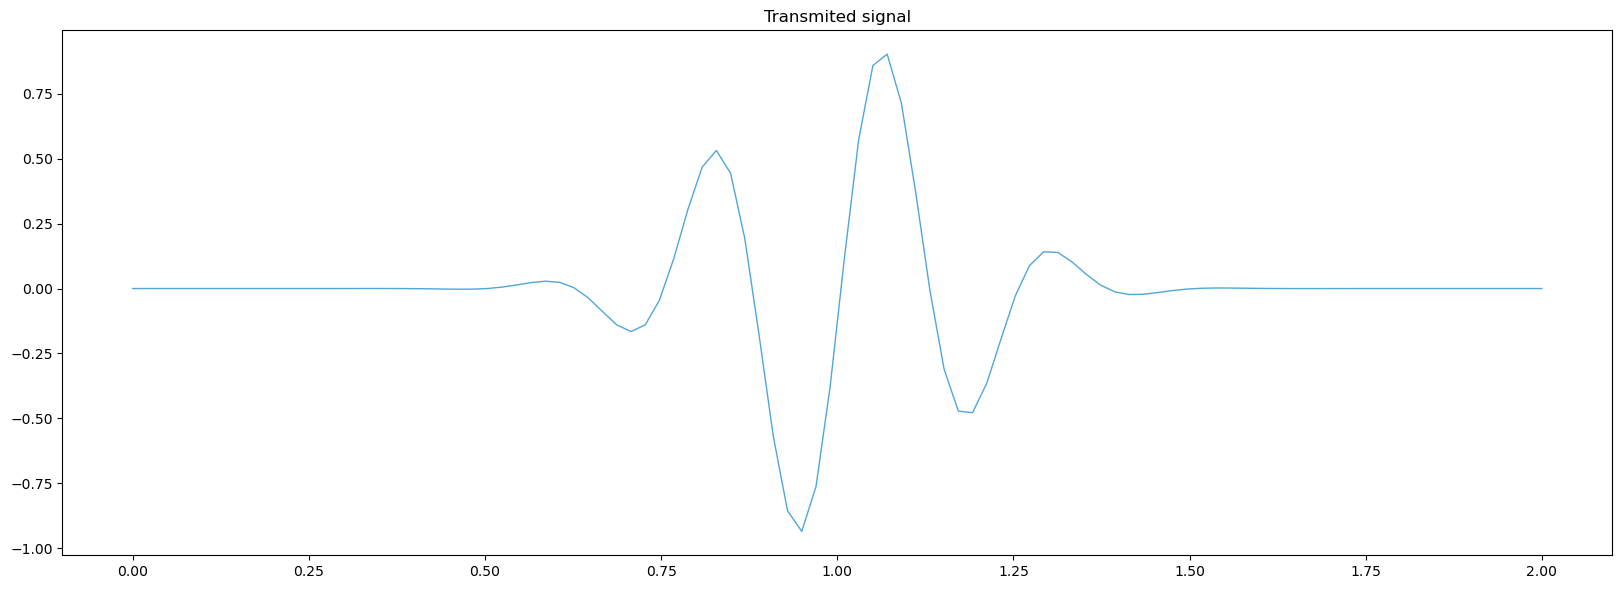

In [3]:
duration_signal = 20
duration_kernel =2
position_kernel = duration_kernel/2
x_kernel = np.linspace(0, duration_kernel, int(1000/(duration_signal/duration_kernel)))
ampl_kernel = np.exp(-(x_kernel - position_kernel)**2 / 0.05)
y_kernel = np.sin(x_kernel * 25) * ampl_kernel

plt.figure(figsize=(20, 15))
plt.subplot(211)
plt.title("Transmited signal")
plt.plot(x_kernel,y_kernel, label="Output", color="#51A6D8", linewidth=1)

### Se crea señal para correlacionar

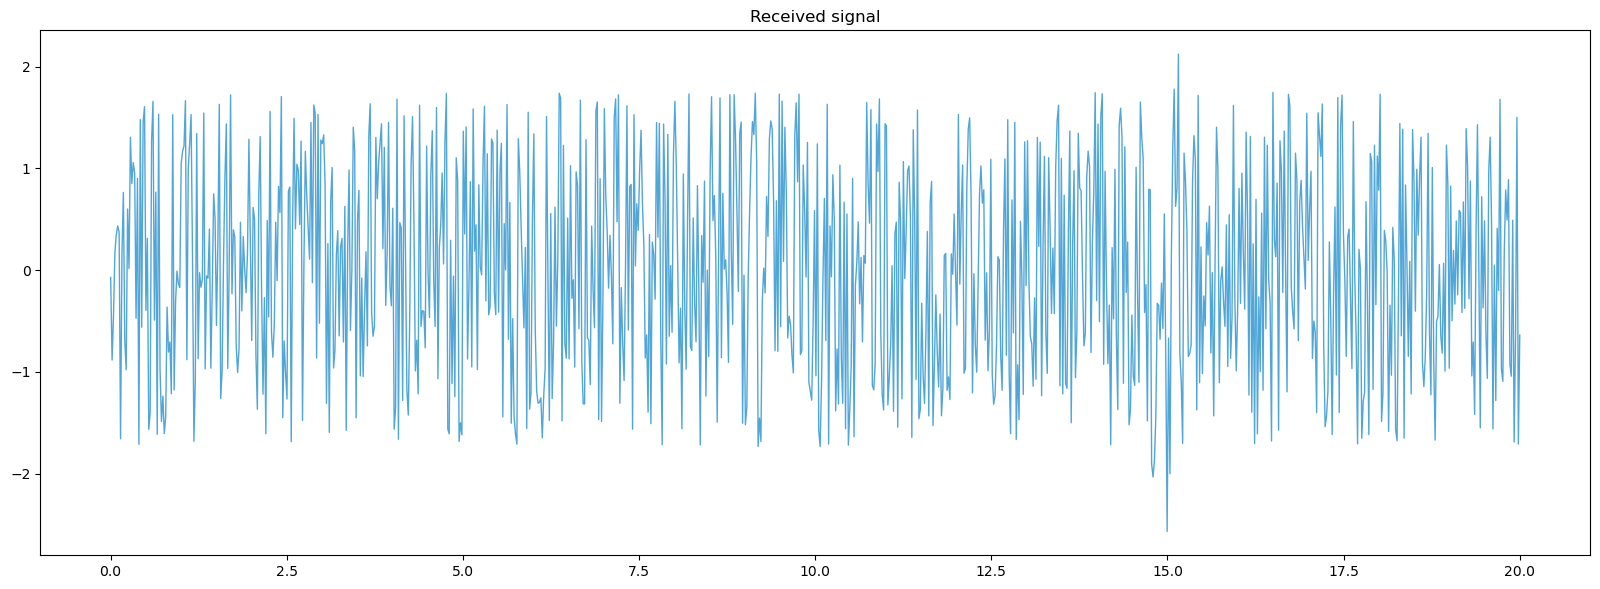

In [4]:
position_signal = 15
x_signal = np.linspace(0, duration_signal, 1000)
ampl_signal = np.exp(-(x_signal - position_signal)**2 / 0.05)
noise = np.random.rand(len(x_signal))*3.5
noise = noise - np.mean(noise)
y_signal = np.sin(x_signal * 25) * ampl_signal+noise

plt.figure(figsize=(20, 15))
plt.subplot(211)
plt.title("Received signal")
plt.plot(x_signal,y_signal, label="Input", color="#51A6D8", linewidth=1)

### Se aplica la correlación y se la normaliza 

In [5]:
corr = signal.correlate(y_signal, y_kernel)
corr /= np.max(corr)

### Se busca el pico máximo de la correlación

In [8]:
peaks, _ = find_peaks(corr, distance=1500, prominence=1.5)

### Se grafican las señales

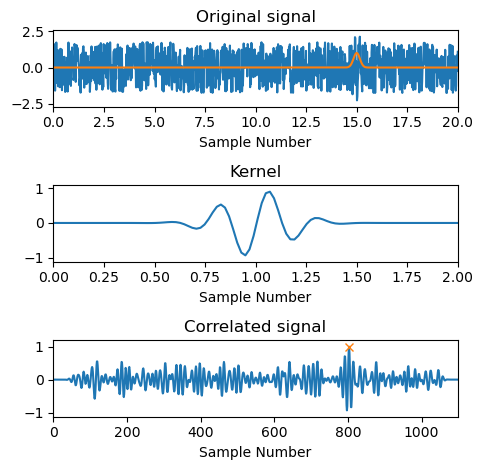

Pulse at: 15, pulse found at: 15.08


In [9]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(x_signal, y_signal)
ax_orig.plot(x_signal, ampl_signal)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(x_kernel, y_kernel)
ax_noise.set_title('Kernel')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(corr)
ax_corr.set_title('Correlated signal')
ax_corr.set_xlabel('Sample Number')
ax_corr.plot(peaks, corr[peaks], "x")
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

peak_time = (peaks - len(x_kernel)/2)*(x_signal[1]-x_signal[0])
print("Pulse at: %d, pulse found at: %5.2f" % (position_signal, peak_time))

In [10]:
# Guardado
filename = "signal"
data =y_signal
np.savetxt(f"{filename}.h", data, newline=',', 
            header=f'#define N_SIGNAL {len(data)}\nconst int16_t signal[] ='+' {0',
            footer='};//',
            comments='',
            )

In [11]:
# Guardado
filename = "kernel"
data =y_kernel
np.savetxt(f"{filename}.h", data, newline=',', 
            header=f'#define N_KERNEL {len(data)}\nconst int16_t kernel[] ='+' {0',
            footer='};//',
            comments='',
            )